## COVID-19 Daily Analysis Table  
  - source:  official data collected by John Hopkins, Stats by Country,  https://github.com/CSSEGISandData/ 
  - worst daily deaths by country evaluating last 7 days
  - charts:  https://dasn.herokuapp.com/covidzoom compare, and https://dasn.herokuapp.com/covid19
  - SUMMARY WARNING ON COUNTRIES BY COVID DAILY DEATH RATES 

In [16]:
try:  ## This table sumarizes the daily deaths by country (calculations below)   %store df9  
    display(df9.transpose().tail(3) )
    print("worst daily deaths by country evaluating last 7 days:")
    display(df9.transpose().tail(9).head(9).mean(axis=0).sort_values(ascending=False).head(7) )
except NameError:
    print("Click Run on this cell only after the RUN ALL completes all calculations")

Country/Region,US,United Kingdom,Spain,Italy,France,Brazil,Belgium,Germany,Turkey,Canada,Russia,Netherlands,Iran,India,Mexico,Canada
4/24/20,1995,768,367,420,389,373,189,185,109,97,60,112,93,59,0,56
4/25/20,1806,813,378,415,369,353,238,117,106,106,66,120,76,45,236,54
4/26/20,1126,413,288,260,242,229,177,99,99,70,66,66,60,56,46,44


worst daily deaths by country evaluating last 7 days:


Country/Region
US                2010.444444
United Kingdom     684.000000
France             463.888889
Italy              433.222222
Spain              354.222222
Brazil             238.333333
Belgium            214.555556
dtype: float64

### How is this daily Calculus performed :   https://github.com/infchg/COVID-19
  - calculations in iPython at  https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
  - source data https://github.com/CSSEGISandData/COVID-19/
  - resources thanks to  http://Jupyter.org  http://MyBinder.org  http://Heroku.com

In [2]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 63.6 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 39.6 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 57.4 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 45.7 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 30.9 MB/s eta 0:00:01    |██████████████████████▋         | 8.8 MB 30.9 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 9.9 MB/s  eta 0:00:01


In [3]:
 ##JH Source THIS IS THE SOURCE OF ALL CALCULATIONS IN THIS PAGE
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213    0   213    0     0   1019      0 --:--:-- --:--:-- --:--:--  1019
100 64382  100 64382    0     0   186k      0 --:--:-- --:--:-- --:--:--  186k


In [4]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [5]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df.sort_values(by=[df.columns[-1]],ascending=False)[cols20] )

,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
Country/Region,,,,,,,,,,,,,
US,25843,28338,32930,36787,38664,40661,42094,44444,46622,49954,51949,53755,54881
Italy,21067,21645,22170,22745,23227,23660,24114,24648,25085,25549,25969,26384,26644
Spain,18056,18708,19315,20002,20043,20453,20852,21282,21717,22157,22524,22902,23190
France,15729,17167,17920,18681,19323,19718,20265,20796,21340,21856,22245,22614,22856
United Kingdom,12107,12868,13729,14576,15464,16060,16509,17337,18100,18738,19506,20319,20732
Belgium,4157,4440,4857,5163,5453,5683,5828,5998,6262,6490,6679,6917,7094
Germany,3294,3804,4052,4352,4459,4586,4862,5033,5279,5575,5760,5877,5976
Iran,4683,4777,4869,4958,5031,5118,5209,5297,5391,5481,5574,5650,5710
China,3221,3222,3222,4512,4512,4512,4512,4512,4512,4512,4512,4512,4512


In [6]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [7]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(16)
display(df9) 

,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
Country/Region,,,,,,,,,,,,
US,2495,4592,3857,1877,1997,1433,2350,2178,3332,1995,1806,1126
United Kingdom,761,861,847,888,596,449,828,763,638,768,813,413
Spain,652,607,687,41,410,399,430,435,440,367,378,288
Italy,578,525,575,482,433,454,534,437,464,420,415,260
France,1438,753,761,642,395,547,531,544,516,389,369,242
Brazil,204,188,217,213,108,125,154,165,425,373,353,229
Belgium,283,417,306,290,230,145,170,264,228,189,238,177
Germany,510,248,300,107,127,276,171,246,296,185,117,99
Turkey,115,125,126,121,127,123,119,117,115,109,106,99


In [8]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
2495,4592,3857,1877,1997,1433,2350,2178,3332,1995,1806,1126"
data-datasets="761,861,847,888,596,449,828,763,638,768,813,413"
data-datasets="652,607,687,41,410,399,430,435,440,367,378,288"
data-datasets="578,525,575,482,433,454,534,437,464,420,415,260"
data-datasets="1438,753,761,642,395,547,531,544,516,389,369,242"
data-datasets="204,188,217,213,108,125,154,165,425,373,353,229"
data-datasets="283,417,306,290,230,145,170,264,228,189,238,177"
data-datasets="510,248,300,107,127,276,171,246,296,185,117,99"
data-datasets="115,125,126,121,127,123,119,117,115,109,106,99"
data-datasets="52,143,58,0,132,119,105,90,109,97,106,70"
data-datasets="28,34,41,40,48,44,51,57,42,60,66,66"
data-datasets="189,181,144,142,83,67,165,138,123,112,120,66"
data-datasets="94,92,89,73,87,91,88,94,90,93,76,60"
data-datasets="12,43,38,35,38,33,53,36,40,59,45,56"
data-datasets="74,43,37,60,104,36,26,145,212,0,236,46"
data-datasets="51,

In [9]:
dxy=df0.transpose()
display(dxy.tail(4)) #pivot('Country/Region')

Country/Region,Algeria,Argentina,Austria,Bangladesh,Belgium,Brazil,Canada,Canada,Canada,Chile,...,Russia,Saudi Arabia,Serbia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,US
4/23/20,5,13,12,7,228,425,4,44,109,8,...,42,7,0,440,84,40,115,13,638,3332
4/24/20,8,11,8,4,189,373,4,56,97,6,...,60,6,0,367,131,40,109,14,768,1995
4/25/20,4,9,6,9,238,353,2,54,106,7,...,66,9,0,378,40,10,106,0,813,1806
4/26/20,6,7,6,5,177,229,0,44,70,8,...,66,3,0,288,2,11,99,8,413,1126


In [17]:
#Worst 7 countries in daily deaths last week 
df9.transpose().tail(8).head(7).mean(axis=0).sort_values(ascending=False).head(7)    #1 Average for each row :

Country/Region
US                2155.857143
United Kingdom     693.571429
France             470.142857
Italy              451.000000
Spain              408.428571
Brazil             243.285714
Belgium            209.142857
dtype: float64

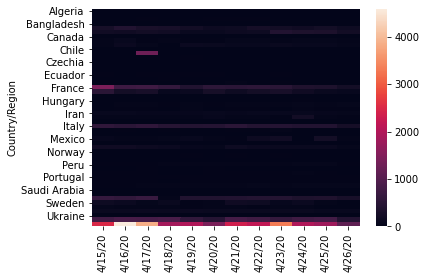

In [11]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

51 13.166666666666666


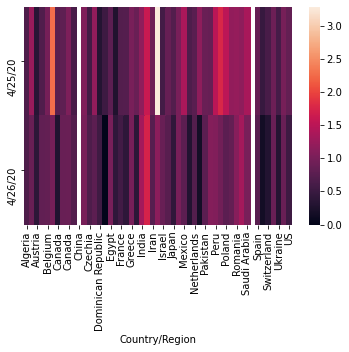

In [12]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
#display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [13]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,4/26/20
Country/Region,
Greece,1.375000
Russia,1.322404
India,1.294118
Colombia,1.070796
Brazil,0.987843
Argentina,0.950617
Panama,0.942857
Chile,0.926316
Indonesia,0.923358


In [14]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)

In [15]:
!pip install chart-studio urllib3 # plotly

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 64 kB 1.9 MB/s eta 0:00:011
     |████████████████████████████████| 7.1 MB 10.0 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=cd566a8e24b383e1ee9f3ee9144c3edc9150d033d7e7d499ea648687fdd099de
  Stored in directory: /home/jovyan/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
